In [3]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [12]:
#Load and preprocess dataset
df = pd.read_csv("Housing.csv")

print("First 5 rows:")
print(df.head())
print("\nDataset Info:")
print(df.info())

First 5 rows:
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 54

In [17]:
#Let's encode categorical variables (if present)
df = pd.get_dummies(df, drop_first=True)

In [18]:
#Split into features and target
X = df.drop("price", axis=1)   # assuming 'price' is target
y = df["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
lr = LinearRegression()
lr.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [20]:
# Predictions and Evaluation
y_pred = lr.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Performance:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")


Model Performance:
Mean Absolute Error (MAE): 970043.403920164
Mean Squared Error (MSE): 1754318687330.6643
R² Score: 0.6529242642153184


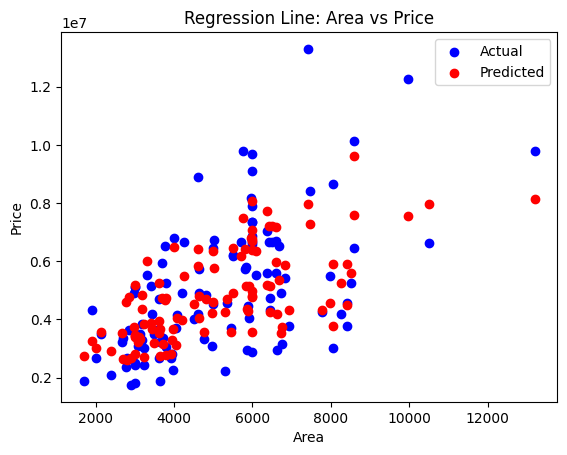

In [21]:
#Plot regression line for one feature 
if "area" in X.columns:
    plt.scatter(X_test["area"], y_test, color="blue", label="Actual")
    plt.scatter(X_test["area"], y_pred, color="red", label="Predicted")
    plt.xlabel("Area")
    plt.ylabel("Price")
    plt.title("Regression Line: Area vs Price")
    plt.legend()
    plt.show()

In [22]:
#Interpret coefficients
coefficients = pd.DataFrame({"Feature": X.columns, "Coefficient": lr.coef_})
print("\nFeature Coefficients:")
print(coefficients)


Feature Coefficients:
                            Feature   Coefficient
0                              area  2.359688e+02
1                          bedrooms  7.677870e+04
2                         bathrooms  1.094445e+06
3                           stories  4.074766e+05
4                           parking  2.248419e+05
5                      mainroad_yes  3.679199e+05
6                     guestroom_yes  2.316100e+05
7                      basement_yes  3.902512e+05
8               hotwaterheating_yes  6.846499e+05
9               airconditioning_yes  7.914267e+05
10                     prefarea_yes  6.298906e+05
11  furnishingstatus_semi-furnished -1.268818e+05
12     furnishingstatus_unfurnished -4.136451e+05
